Building a linear regression model in Python using the scikit-learn package. We will be using the Diabetes dataset (built-in data from scikit-learn) and the Boston Housing (download from GitHub) dataset.

In [13]:
import pandas as pd
BostonHousing = pd.read_csv('BostonHousing.csv')

In [12]:
BostonHousing
# X are all the columns except the last one, medv is the Y

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [15]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [18]:
X = BostonHousing.drop(['medv'], axis=1)
X

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [21]:
X_test.shape, Y_test.shape

((102, 13), (102,))

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
model = linear_model.LinearRegression()

In [24]:
model.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_pred = model.predict(X_test)

In [26]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-9.54953601e-02  4.68629291e-02  5.00968580e-02  3.68105259e+00
 -1.70847793e+01  4.03559880e+00  9.06800864e-03 -1.33416655e+00
  3.18100181e-01 -1.28336480e-02 -9.11160589e-01  1.01005895e-02
 -5.21660656e-01]
Intercept: 32.157839157734195
Mean squared error (MSE): 25.68
Coefficient of determination (R^2): 0.74


In [27]:
BostonHousing.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [28]:
import seaborn as sns

In [29]:
Y_test

126    15.7
49     19.4
231    31.7
175    29.4
364    21.9
       ... 
375    15.0
81     23.9
302    26.4
111    22.8
309    20.3
Name: medv, Length: 102, dtype: float64

In [30]:
Y_pred

array([14.88277547, 17.08898293, 33.33549058, 30.01425159, 39.29343405,
       20.44650908, 45.34389975, 21.14491947, 32.50038189, 21.85791218,
       21.04336044, 26.26974951, 36.51746362, 16.66319495, 30.57876754,
        6.69152361, 19.99004628, 31.99798101, 27.16782403, 17.29504485,
       23.44580612, 43.31973594, 18.93614628, 40.56516408, 16.77842468,
       20.96383145, 36.52357803, 18.16147259, 12.50708002, 25.24341927,
       26.65780471, 36.98549716, 21.70232062, 35.44968614, 38.51450555,
       26.84746741, 33.60335046, 27.97655397, 22.11566641, 22.46678119,
        9.96382977, 37.79218177, 16.4451204 , 24.46753359, 17.71829836,
       18.66288972, 19.74692   ,  9.26051974, 19.44892668, 16.03458256,
       18.45172017, 24.0836312 , 22.28267731, 16.11793608, 31.46223045,
       30.80170052, 21.08509755, 35.01689915, 20.81597656, 25.47669673,
       19.24463659, 19.57664325, 20.0615724 , 16.09757653, 17.76910312,
       18.25390648, 24.08530163,  6.28259174, 32.5084944 , 16.55

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

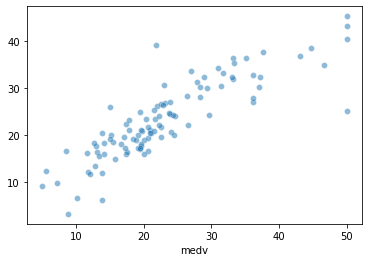

In [32]:
sns.scatterplot(Y_test , Y_pred, alpha=.5)